In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pages = []
for i in range(1, 6):
    url = 'https://www.top500.org/list/2018/06/?page=' + str(i)
    pages.append(url)
file=open("output.txt","a+")
data=[]
for x in pages:
    results=requests.get(x)
    c=results.content
    soup=BeautifulSoup(c)
    bs=soup.find("table",{"class":"table table-condensed table-striped"})
    tr=bs.findAll("tr")
    
    for rows in tr:
        data_in_row=[]
        td=rows.findAll("td")
        for each_td in td:
            text=each_td.findAll(text=True)
            text = [x for x in text if x !='\n']
            data_in_row.extend(text)
            file.write(str(text)+"\n")
        data.append(data_in_row)        
#url=requests.get("")
#c=url.content

C:\Users\mitta\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\mitta\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:
data

[[],
 ['1',
  'DOE/SC/Oak Ridge National Laboratory',
  'United States',
  'Summit',
  ' - IBM Power System AC922, IBM POWER9 22C 3.07GHz, NVIDIA Volta GV100, Dual-rail Mellanox EDR Infiniband\n                    ',
  'IBM',
  '2,282,544',
  '122,300.0',
  '187,659.3',
  '8,806'],
 ['2',
  'National Supercomputing Center in Wuxi',
  'China',
  'Sunway TaihuLight',
  ' - Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway\n                    ',
  'NRCPC',
  '10,649,600',
  '93,014.6',
  '125,435.9',
  '15,371'],
 ['3',
  'DOE/NNSA/LLNL',
  'United States',
  'Sierra',
  ' - IBM Power System S922LC, IBM POWER9 22C 3.1GHz, NVIDIA Volta GV100, Dual-rail Mellanox EDR Infiniband\n                    ',
  'IBM',
  '1,572,480',
  '71,610.0',
  '119,193.6'],
 ['4',
  'National Super Computer Center in Guangzhou',
  'China',
  'Tianhe-2A',
  ' - TH-IVB-FEP Cluster, Intel Xeon E5-2692v2 12C 2.2GHz, TH Express-2, Matrix-2000\n                    ',
  'NUDT',
  '4,981,760',
  '61,444.5',
  '100,678.7

In [33]:
#a) Using Python with BeautifulSoup, extract the data from the Web site

 #  and create a csv dataset containing that data.

import pandas as pd

columns = ['Rank','Site','Country','System1','System2','System3','Cores','Rmax','Rpeak','Power']



df = pd.DataFrame(data[1:], columns=columns)
df_CoresToPower=df.iloc[:,6:10]
df4=df_CoresToPower


In [6]:
df.to_csv('output.csv')#output of the BeautifulSoup is copied to OUTPUT.CSV

In [7]:
#b) Clean & explore the dataset, producing summary statistics

 #  for Cores, RMax, RPeak, and Power.

df.isnull().sum()#No of NA'S in each column in the dataframe.

Rank         4
Site         4
Country      4
System1      4
System2      4
System3      4
Cores        4
Rmax         4
Rpeak      128
Power      311
dtype: int64

In [8]:
df4['Cores'].describe()#summary statistics for Cores Column

count        500
unique       345
top       57,600
freq          27
Name: Cores, dtype: object

In [9]:
df4.isnull().sum()#No of NA'S in each column in the dataframe.

Cores      4
Rmax       4
Rpeak    128
Power    311
dtype: int64

In [10]:
df4.fillna(method ='ffill', inplace = True) #using ffill method, which fills the data using the previous  value in the same column.


C:\Users\mitta\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [11]:
df4.isnull().sum()#there are no missing values and filled by previous column values.

Cores    0
Rmax     0
Rpeak    0
Power    0
dtype: int64

In [12]:
df4.describe()

,Cores,Rmax,Rpeak,Power
count,504,504,504,504
unique,345,367,292,164
top,"57,600","1,649.1","2,119.7","3,747"
freq,28,26,26,27


In [13]:
df4['Cores'].describe()

count        504
unique       345
top       57,600
freq          28
Name: Cores, dtype: object

In [14]:
df4['Rmax'].describe()

count         504
unique        367
top       1,649.1
freq           26
Name: Rmax, dtype: object

In [15]:
df4['Rpeak'].describe()

count         504
unique        292
top       2,119.7
freq           26
Name: Rpeak, dtype: object

In [16]:
df4['Power'].describe()

count       504
unique      164
top       3,747
freq         27
Name: Power, dtype: object

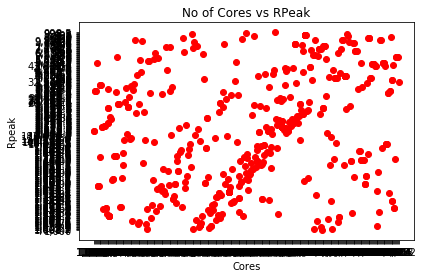

In [63]:
#c) Display and explain the relationship between 

#Cores and RPeak(theretical performance)

#Cores and Power(How much power does it consume)
x=df4['Cores']
y=df4['Rpeak']
plt.scatter(x,y,color='red')
plt.xlabel('Cores')
plt.ylabel('Rpeak')
plt.title("No of Cores vs RPeak")
plt.show()
#as number of cores increased the Rpeak performance also improved for some system and they follow a linear regression.
#and there are also other systems, where the number of cores are less and theoretical performance is high.
#and there are also other systems, where the number of cores are high and theoretical performance is low.
#therefore all kinds of data is present.

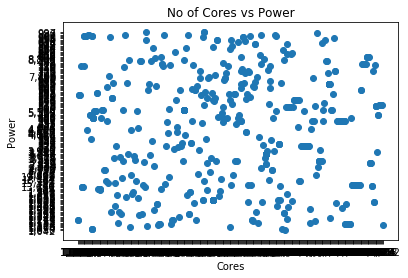

In [30]:
#df4.plot(kind='scatter',df4['Cores'],df4['Power'])
#country.plot(kind="bar",fill="black",color="orange")

N = 50
a = df4['Cores']
b = df4['Power']
colors = np.random.rand(N)
#area = (10 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(a, b)
plt.xlabel('Cores')
plt.ylabel('Power')
plt.title("No of Cores vs Power")
plt.show()

#Even in this case, there are all kinds of data, 
#1.When no of cores increase Power also increased, which follows linear regression.
#2.when no of cores high and increasing, some systems have less power consumption.
#3.There are also systems, when no of cores are less and also systems having high power. 

In [19]:
#d) [Challenge problem, bonus 10 extra points]:

#Display summary statistics and visualizations for the Country data.
country=pd.DataFrame(df.Country.value_counts())
country

,Country
China,206
United States,124
Japan,36
United Kingdom,22
Germany,21
France,18
Netherlands,9
"Korea, South",7
Ireland,7
Canada,6


In [20]:
country.describe()#summary statistics for country data.

,Country
count,27.000000
mean,18.518519
std,44.492325
min,1.000000
25%,1.500000
50%,4.000000
75%,8.000000
max,206.000000


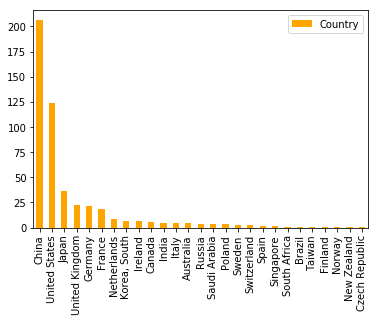

In [21]:
country.plot(kind="bar",fill="black",color="orange")#Visualizations for country data.